In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# 读取数据
train = pd.read_csv('/root/autodl-fs/data/train_revise+45缩减到100特征 数量1000个 去掉三列和Name.csv')

# 分离特征和标签
X = train.drop(['senolytic'], axis=1)
y = train['senolytic']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],       # 惩罚参数
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # 核函数
    'gamma': ['scale', 'auto']     # 核函数系数
}

# 初始化SVM模型
svm = SVC(probability=True, class_weight='balanced')

# 使用GridSearchCV寻找最优参数
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 输出最优参数
print("最优参数:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 3.4min
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time= 2.1min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=20.0min
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=26.4min
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=90.6min
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=90.3min
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=auto

In [4]:
# 使用最优参数训练SVM模型
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# 预测和计算评价指标
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

# 计算评价指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 输出评价指标
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.83
Precision: 0.4838709677419355
Recall: 0.45454545454545453
F1 Score: 0.46874999999999994


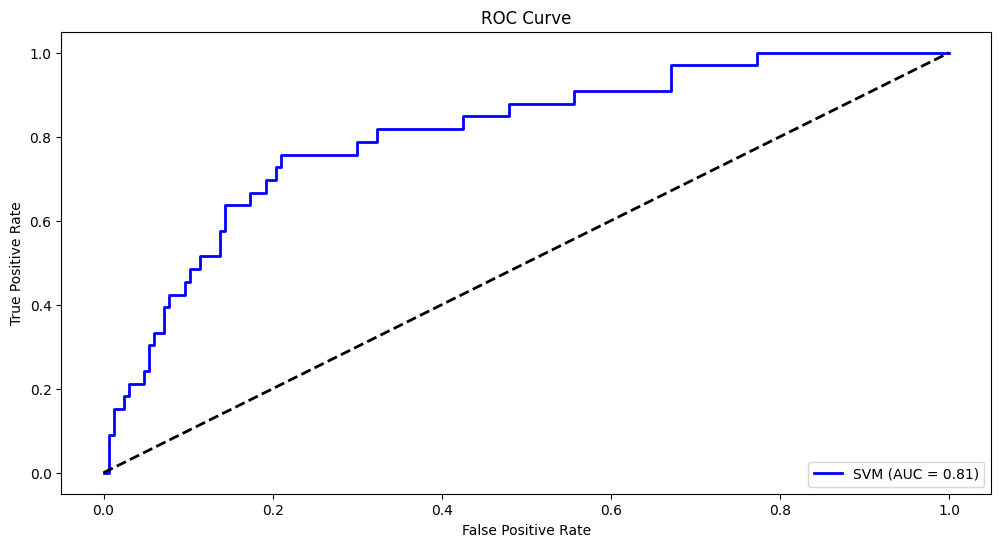

In [5]:
# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

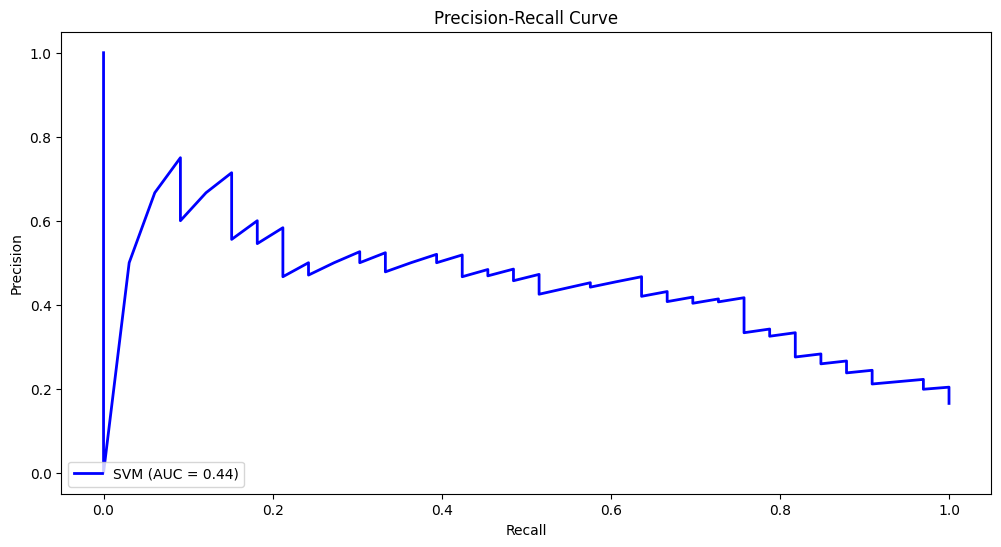

In [6]:
# 绘制PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'SVM (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()